In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [194]:
csv = r"C:\Users\Daniel.Aragon\Desktop\TEMP\TO2\OM_hydraulics.csv"
df = pd.read_csv(csv)
df.head()

,RAS STA,Slope,V,Dscour
0,9155.282,0.0794,7.58,NaN
1,9050.821,0.0570,7.61,NaN
2,8967.188,0.0882,7.23,NaN
3,8892.489,0.0836,8.41,NaN
4,8803.545,0.1196,6.86,NaN


In [195]:
# Fill NaN values with zero
df.fillna(value=0, inplace=True)
df.head()

,RAS STA,Slope,V,Dscour
0,9155.282,0.0794,7.58,0.0
1,9050.821,0.0570,7.61,0.0
2,8967.188,0.0882,7.23,0.0
3,8892.489,0.0836,8.41,0.0
4,8803.545,0.1196,6.86,0.0


In [196]:
# Add stream stationing
StationMax = max(df['RAS STA'])

# Convert Ras Stationing to Stream stationing by inverting and reseting 0 location
df['STA'] = abs(df['RAS STA'] - StationMax) - 250

# Drop stations beyond end of project
df = df[df['STA'] <= 8200]

df.tail()

,RAS STA,Slope,V,Dscour,STA
185,845.0002,0.1402,9.95,0.000000,8060.2818
186,809.4067,0.1577,9.64,0.135463,8095.8753
187,783.0320,0.1890,9.84,0.000000,8122.2500
188,746.9471,0.1114,9.43,0.543616,8158.3349
189,706.2033,0.0419,4.78,0.000000,8199.0787


In [197]:
# Create grouped bar chart
# https://pythonspot.com/matplotlib-bar-chart/

# create plot
n_groups = 3

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 100
opacity = 0.8

xticks = np.array(df['STA'])
xticks = xticks[5::9]
# xticks = [str(int(item)) for item in xticks]
# print (xticks)

# right  = [item[-2:] for item in xticks]
# left   = [item[0:-2] for item in xticks]

# combnd = []
# for i in range(len(left)):
# #     combnd[i] = np.concatenate(left[i], right[i])
# #     print (i)
# #     print (left[i], right[i])
# #     new_string = np.concatenate((left[i], right[i]), axis=0)
#     new_string = np.append((left[i], '+', right[i]))
# #     print (new_string)
#     combnd = np.append(combnd,new_string, axis=0)
# combnd

    


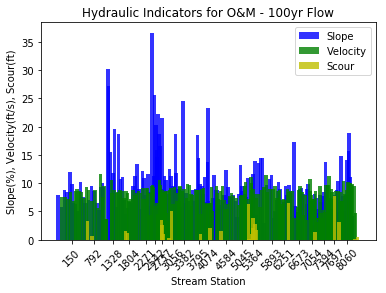

In [198]:
# Create bar plots, one at a time
Var1 = plt.bar(df['STA'], df['Slope']*100, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Slope')
 
Var2 = plt.bar(df['STA'] + bar_width, df['V'], bar_width,
                 alpha=opacity,
                 color='g',
                 label='Velocity')

Var3 = plt.bar(df['STA'] + 2*bar_width, df['Dscour'], bar_width,
                 alpha=opacity,
                 color='y',
                 label='Scour')

plt.xlabel('Stream Station')
plt.ylabel('Slope(%), Velocity(ft/s), Scour(ft)')
plt.title('Hydraulic Indicators for O&M - 100yr Flow')
plt.xticks(xticks, rotation='45')
plt.legend()
 
plt.show()

In [201]:
# savefig('goldrun_hydraulics.png', bbox_inches='tight')
fig.savefig('plot.pdf', bbox_inches='tight')
plt.close()